# ML Lab 03

## Prit Kanadiya
## 211070010

<b>Aim</b>: To implement Decision Trees on iris dataset

<b>Theory</b>: 

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

<img src="https://miro.medium.com/v2/resize:fit:1396/1*8j59L67JO7rIcaprusxepQ.png" alt="decision tree">

Some advantages of decision trees are:

* Simple to understand and to interpret. Trees can be visualized.

* Requires little data preparation. Other techniques often require data normalization, dummy variables need to be created and blank values to be removed. Some tree and algorithm combinations support missing values.

* The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree.

* Able to handle both numerical and categorical data. However, the scikit-learn implementation does not support categorical variables for now. Other techniques are usually specialized in analyzing datasets that have only one type of variable. See algorithms for more information.

* Able to handle multi-output problems.

* Uses a white box model. If a given situation is observable in a model, the explanation for the condition is easily explained by boolean logic. By contrast, in a black box model (e.g., in an artificial neural network), results may be more difficult to interpret.

* Possible to validate a model using statistical tests. That makes it possible to account for the reliability of the model.

* Performs well even if its assumptions are somewhat violated by the true model from which the data were generated.

The disadvantages of decision trees include:

* Decision-tree learners can create over-complex trees that do not generalize the data well. This is called overfitting. Mechanisms such as pruning, setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.

* Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.

* Predictions of decision trees are neither smooth nor continuous, but piecewise constant approximations as seen in the above figure. Therefore, they are not good at extrapolation.

* The problem of learning an optimal decision tree is known to be NP-complete under several aspects of optimality and even for simple concepts. Consequently, practical decision-tree learning algorithms are based on heuristic algorithms such as the greedy algorithm where locally optimal decisions are made at each node. Such algorithms cannot guarantee to return the globally optimal decision tree. This can be mitigated by training multiple trees in an ensemble learner, where the features and samples are randomly sampled with replacement.

* There are concepts that are hard to learn because decision trees do not express them easily, such as XOR, parity or multiplexer problems.

* Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree.

<b>Gini Index</b>: The Gini Index or Gini Impurity is calculated by subtracting the sum of the squared probabilities of each class from one. It favours mostly the larger partitions and are very simple to implement. In simple terms, it calculates the probability of a certain randomly selected feature that was classified incorrectly.

In [2]:
# Import all the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.tree import export_graphviz

In [3]:
# Loading the iris dataset
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'
iris = pd.read_csv(url)

In [4]:
# Extracting data and labels as numpy arrays from the dataset
X = iris.iloc[:, :-1].values
Y = iris.iloc[:, -1].values

print(X.shape)
print(Y.shape)

(150, 4)
(150,)


In [5]:
# Spliting the data into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


In [6]:
# We first preprocess the data by standardizing the features.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# Training the Decision Tree model
model = DecisionTreeClassifier(criterion='gini')
model.fit(X_train, Y_train)

DecisionTreeClassifier()

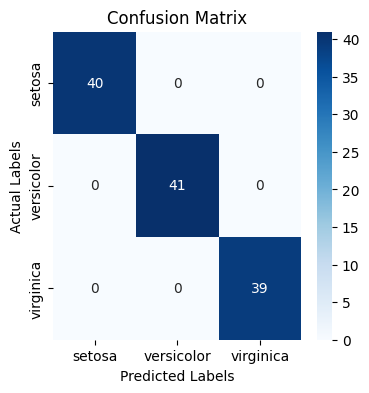

1.0


In [13]:
# Printing confusion matrix for Training set
Y_pred = model.predict(X_train)
matrix = confusion_matrix(Y_train, Y_pred)
score = accuracy_score(Y_train, Y_pred)

plt.figure(figsize=(4, 4))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['setosa', 'versicolor', 'virginica'], yticklabels=['setosa', 'versicolor', 'virginica'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()
print(score)

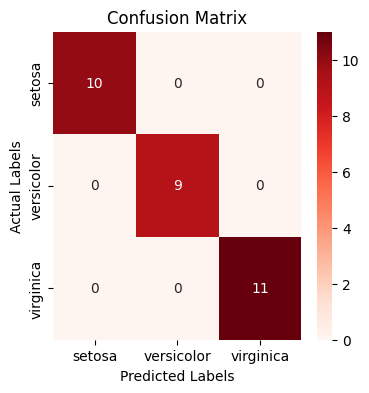

In [9]:
# Printing confusion matrix for Training set
Y_pred = model.predict(X_test)
matrix = confusion_matrix(Y_test, Y_pred)
score = accuracy_score(Y_test, Y_pred)

plt.figure(figsize=(4, 4))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Reds', xticklabels=['setosa', 'versicolor', 'virginica'], yticklabels=['setosa', 'versicolor', 'virginica'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

[Text(0.3076923076923077, 0.9285714285714286, 'x[3] <= -0.512\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 0.586\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 0.623\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 0.756\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.38461538461538464, 0.5, 'x[2] <= 0.701\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.46153846153846156, 0.35714285714285715, 'x[3] <= 0.489\ngini = 0.444\nsamples = 6\nvalue = [0, 

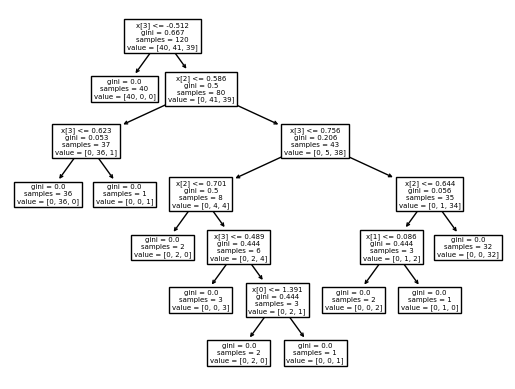

In [10]:
tree.plot_tree(model)

<b>Conclusion</b>: Hence understood and implemented decision trees using iris dataset.